# Customer Churn Model Training using ANN

## Introduction

This notebook demonstrates the implementation of an Artificial Neural Network (ANN) to predict whether a bank customer will exit (churn) based on various features. The process involves data preprocessing, feature encoding, model building, training, and evaluation.

---

### 1. Load the Dataset

We start by loading the dataset containing customer information and their churn status.


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
import pickle

In [2]:
## Load the dataset
data=pd.read_csv("Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0



---

### 2. Data Preprocessing

Drop Irrelevant Columns

In [3]:
## Preprocess the data
### Drop irrelevant columns
data=data.drop(['RowNumber','CustomerId','Surname'],axis=1)
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


We remove columns that do not contribute to prediction, such as `RowNumber`, `CustomerId`, and `Surname`.

---

#### 2.1 Encode Categorical Variables

Encode Gender

In [4]:
## Encode categorical variables
label_encoder_gender=LabelEncoder()
data['Gender']=label_encoder_gender.fit_transform(data['Gender'])
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


The Gender column is transformed into numerical format using LabelEncoder.

---

#### 2.2 One-Hot Encode Geography

In [5]:
## Onehot encode 'Geography
from sklearn.preprocessing import OneHotEncoder
onehot_encoder_geo=OneHotEncoder()
geo_encoder=onehot_encoder_geo.fit_transform(data[['Geography']]).toarray()
geo_encoder

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [6]:
onehot_encoder_geo.get_feature_names_out(['Geography'])

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [7]:
geo_encoded_df=pd.DataFrame(geo_encoder,columns=onehot_encoder_geo.get_feature_names_out(['Geography']))
geo_encoded_df

,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
9995,1.0,0.0,0.0
9996,1.0,0.0,0.0
9997,1.0,0.0,0.0
9998,0.0,1.0,0.0


In [8]:
## Combine one hot encoder columns with the original data
data=pd.concat([data.drop('Geography',axis=1),geo_encoded_df],axis=1)
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


The Geography column is one-hot encoded to create separate binary columns for each country.

---

### 3. Save Encoders and Scaler

In [9]:
## Save the encoders and sscaler
with open('label_encoder_gender_new.pkl','wb') as file:
    pickle.dump(label_encoder_gender,file)

with open('onehot_encoder_geo.pkl','wb') as file:
    pickle.dump(onehot_encoder_geo,file)


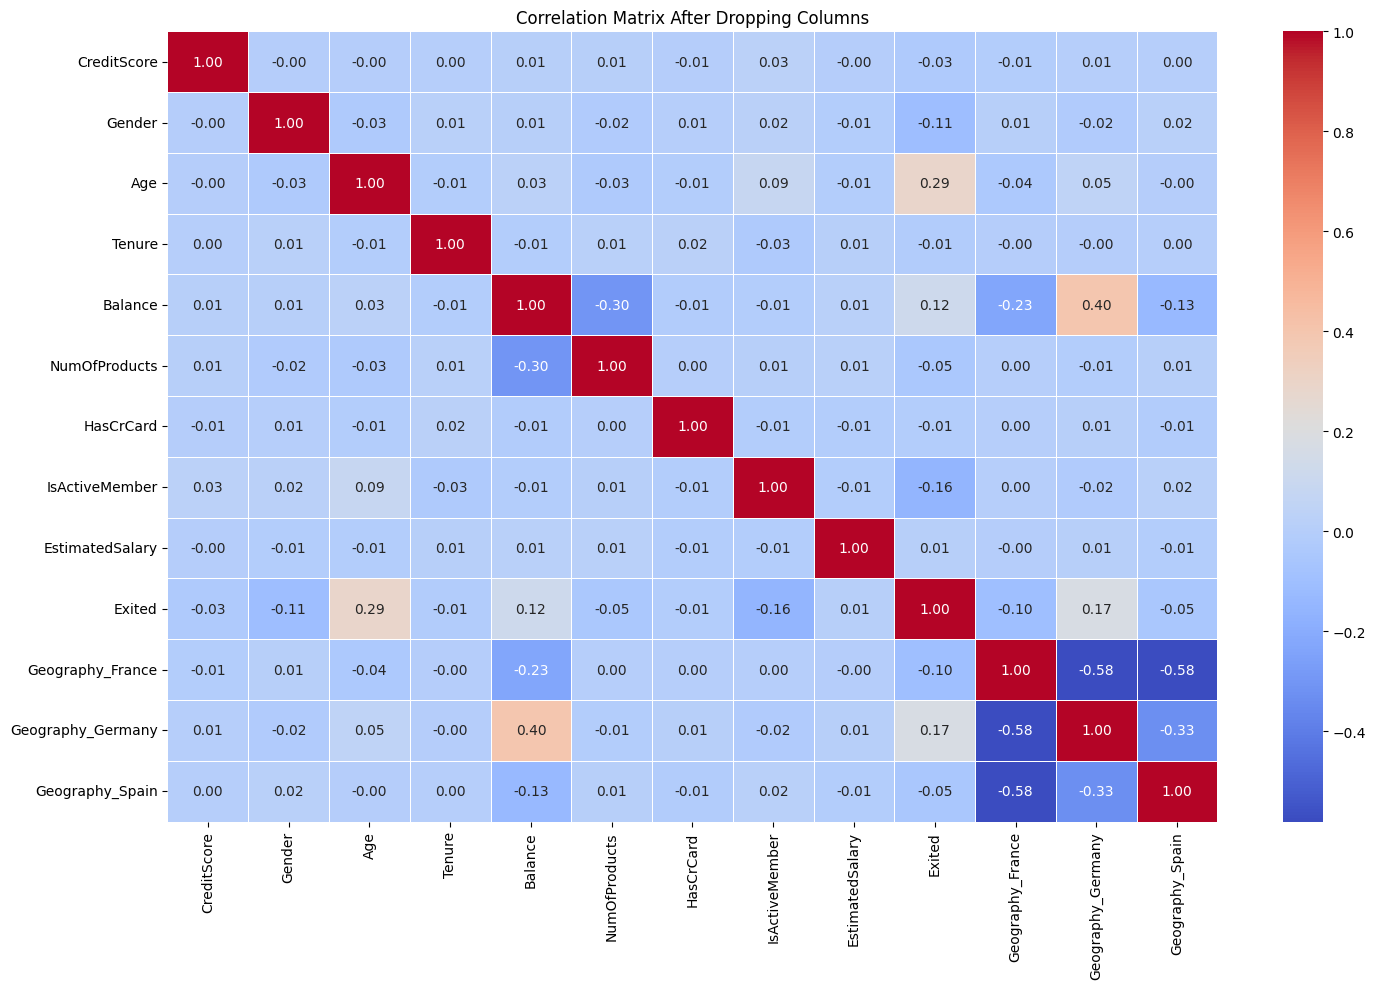

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix_after = data.corr(numeric_only=True)
# Increase figure size for better readability
plt.figure(figsize=(15, 10))  # Adjust width and height as needed


# Plot correlation matrix after dropping columns
sns.heatmap(corr_matrix_after, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix After Dropping Columns")

plt.tight_layout()
plt.show()

In [11]:
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


We save the encoders for future use when processing new data.

---

### 4. Splitting the Dataset

In [12]:
## DiVide the dataset into indepent and dependent features
X=data.drop('Exited',axis=1)
y=data['Exited']

## Split the data in training and tetsing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
X_train.shape

(8000, 12)

We divide the dataset into training and testing sets to evaluate model performance.

---

### 5. Feature Scaling

In [14]:
## Scale these features
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [15]:
X_train

array([[ 0.35649971,  0.91324755, -0.6557859 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [-0.20389777,  0.91324755,  0.29493847, ..., -0.99850112,
         1.72572313, -0.57638802],
       [-0.96147213,  0.91324755, -1.41636539, ..., -0.99850112,
        -0.57946723,  1.73494238],
       ...,
       [ 0.86500853, -1.09499335, -0.08535128, ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.15932282,  0.91324755,  0.3900109 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.47065475,  0.91324755,  1.15059039, ..., -0.99850112,
         1.72572313, -0.57638802]])

In [16]:
with open('scaler.pkl','wb') as file:
    pickle.dump(scaler,file)

In [17]:
data

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1.0,0.0,0.0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1.0,0.0,0.0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1.0,0.0,0.0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0.0,1.0,0.0


The numerical features are standardized to improve ANN performance.

---

### 6. ANN Implementation

#### 6.1 Import TensorFlow and Define Model

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
import datetime

2025-03-14 19:45:04.806191: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-14 19:45:04.811239: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-14 19:45:04.820188: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741981504.835178   33550 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741981504.839643   33550 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1741981504.852766   33550 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [19]:
(X_train.shape[1],)

(12,)

In [20]:
## Build Our ANN Model
model=Sequential([
    Dense(64,activation='relu',input_shape=(X_train.shape[1],)), ## HL1 Connected wwith input layer
    Dense(32,activation='relu'), ## HL2
    Dense(1,activation='sigmoid')  ## output layer
]
)

/home/codespace/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-03-14 19:45:07.497088: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

A sequential neural network is defined with two hidden layers and an output layer using a sigmoid activation function for binary classification.

#### 6.2 Compile the Model

In [22]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)
loss=tensorflow.keras.losses.BinaryCrossentropy()
loss

<LossFunctionWrapper(<function binary_crossentropy at 0x7d084ffea660>, kwargs={'from_logits': False, 'label_smoothing': 0.0, 'axis': -1})>

In [23]:
## compile the model
model.compile(optimizer=opt,loss="binary_crossentropy",metrics=['accuracy', 'precision', 'recall'])

We compile the model using the Adam optimizer and binary cross-entropy loss function.

#### 6.3 Set Up Callbacks

In [24]:
## Set up the Tensorboard
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard

log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorflow_callback=TensorBoard(log_dir=log_dir,histogram_freq=1)

In [25]:
## Set up Early Stopping
early_stopping_callback=EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)


We configure TensorBoard for visualization and early stopping to prevent overfitting.

#### 6.4 Train the Model

In [26]:
### Train the model
history=model.fit(
    X_train,y_train,validation_data=(X_test,y_test),epochs=100,
    callbacks=[tensorflow_callback,early_stopping_callback]
)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8141 - loss: 0.4266 - precision: 0.5916 - recall: 0.2797 - val_accuracy: 0.8590 - val_loss: 0.3567 - val_precision: 0.6934 - val_recall: 0.5064
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8544 - loss: 0.3538 - precision: 0.7441 - recall: 0.4397 - val_accuracy: 0.8540 - val_loss: 0.3679 - val_precision: 0.6490 - val_recall: 0.5598
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8623 - loss: 0.3400 - precision: 0.7581 - recall: 0.4767 - val_accuracy: 0.8560 - val_loss: 0.3684 - val_precision: 0.6868 - val_recall: 0.4911
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8560 - loss: 0.3476 - precision: 0.7497 - recall: 0.4514 - val_accuracy: 0.8605 - val_loss: 0.3403 - val_precision: 0.7227 - val_recall: 0.4707
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8607 - loss: 0.3370 - precision: 0.7413 - recall: 0.4578 - val_accuracy: 0.8520 - val_los

In [27]:
# Assuming X_test and y_test are your test data and labels
loss, accuracy, precision, recall = model.evaluate(X_test, y_test)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8582 - loss: 0.3375 - precision: 0.7238 - recall: 0.4552
Loss: 0.34031522274017334
Accuracy: 0.8604999780654907
Precision: 0.72265625
Recall: 0.47073790431022644


The model is trained with a validation set, and callbacks are used for monitoring.

---

### 7. Save the Model

In [28]:

model.save('modelA.h5')

The trained ANN model is saved for future inference.

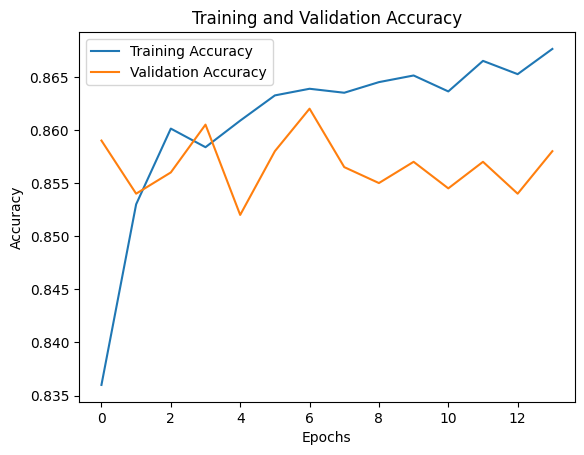

In [29]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


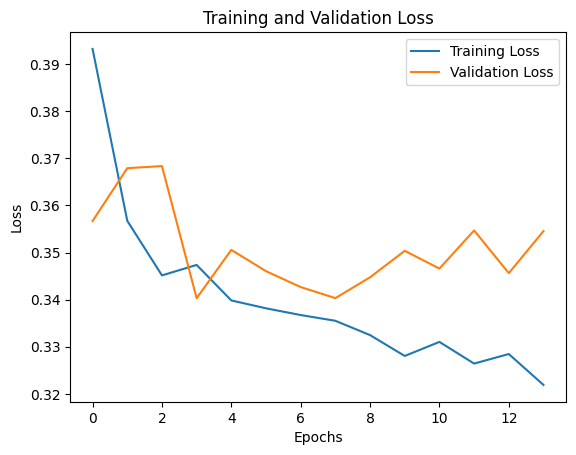

In [30]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Performance Summary of ANN:

> Training Accuracy: Increases from 86.45% (Epoch 1) to 87.44% (Epoch 11).

> Training Precision: Improves from 79.51% to 82.16%.

> Training Recall: Slightly improves from 45.08% to 48.34%.

> Training Loss: Decreases from 0.3371 to 0.3052.

> Validation Accuracy: Fluctuates around 85.95% to 86.40%.

> Validation Precision: Decreases from 75.93% to 70.44%.

> Validation Recall: Increases from 41.73% to 49.10%.

> Validation Loss: Increases from 0.3435 to 0.3623.

### Conclusion:

> Overfitting: The model performs well on training data but struggles with validation data, showing signs of overfitting.

> Recommendation: Apply regularization (e.g., dropout), early stopping, or adjust the model’s complexity to improve generalization.